# 1. Квадратичное программирование и QP солвер

Импортируем необходимые для задания библиотеки

In [1]:
from cvxopt import matrix, solvers

Решаем задачу оптимизации для двумерного пространства:
$$f(\boldsymbol x) = -8x_1 - 16x_2 + x_1^2 + 4x_2^2, \quad \text{s.t.:} \; x_1 + x_2 \leq 5, \; 0 \leq x_1 \leq 3, \; x_2 \geq 0$$

Для этого определим матрицы, необходимые для нахождения точки минимума:

In [2]:
P = matrix([[2.0, 0.0],
            [0.0, 8.0]])  # 2*x1^2 и 2*4*x2^2

q = matrix([-8.0, -16.0])  # -8*x1 и -16*x2


G = matrix([[1.0, -1.0, 1.0, 0.0],  # левая часть ограничений
            [1.0, 0.0, 0.0, -1.0]])
h = matrix([5.0, 0.0, 3.0, 0.0])  # правая часть ограничений


In [3]:

# Решаем задачу
solution = solvers.qp(P, q, G, h)

# Выводим результаты
x = solution['x']
print("Оптимальное значение x1:", x[0])
print("Оптимальное значение x2:", x[1])
print("Минимальное значение функции:", solution['primal objective'])


     pcost       dcost       gap    pres   dres
 0: -3.0512e+01 -3.8829e+01  8e+00  0e+00  2e-01
 1: -3.0792e+01 -3.1146e+01  4e-01  2e-16  5e-03
 2: -3.0982e+01 -3.1024e+01  4e-02  1e-16  4e-04
 3: -3.0997e+01 -3.1003e+01  6e-03  2e-16  5e-17
 4: -3.1000e+01 -3.1000e+01  7e-04  2e-16  3e-17
 5: -3.1000e+01 -3.1000e+01  1e-04  2e-16  4e-17
 6: -3.1000e+01 -3.1000e+01  1e-05  2e-16  3e-17
Optimal solution found.
Оптимальное значение x1: 2.9999998301061535
Оптимальное значение x2: 1.9986909284531613
Минимальное значение функции: -30.99999280553902


**Визуальное решение**

In [4]:
import matplotlib.pyplot as plt
import numpy as np

C:\Users\1\AppData\Local\Temp\ipykernel_12856\1475976510.py:16: UserWarning: linewidths is ignored by contourf
  plt.contourf(x1, x2, constr1 & constr2 & constr3, 1, alpha=0.5, linewidths=4, cmap='gray')


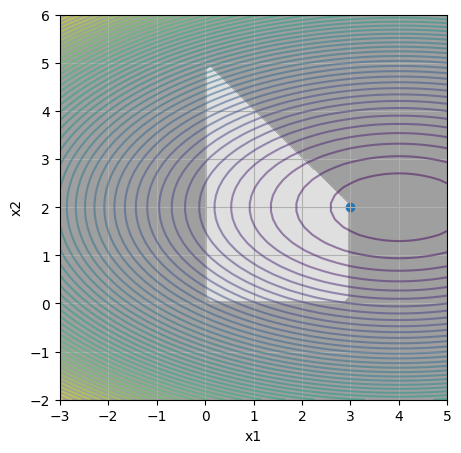

In [5]:
x1 = np.linspace(-3, 5, 50)
x2 = np.linspace(-2, 6, 50)
xx1, xx2 = np.meshgrid(x1, x2)

f = -8*xx1 - 16*xx2 + xx1**2 + 4*xx2**2
constr1 = (xx1 + xx2 <= 5)
constr2 = (0 <= xx1) & (xx1 <= 3)
constr3 = (xx2 >= 0)

plt.figure(figsize=(5, 5))
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')

plt.contour(x1, x2, f, 50, alpha=0.5)
plt.contourf(x1, x2, constr1 & constr2 & constr3, 1, alpha=0.5, linewidths=4, cmap='gray')
_ = plt.scatter([3], [2])

**3 пункт**

Думаю, что ответ на данный вопрос можно предоставить словесно. Мы уже решили задачу и нашли точки оптимума. Если посмотреть на получившиеся ответы, то видим, что х1 довольно близок к одной из границ. Этот факт позволяет сделать вывод, что ограничение x1<=3 является активным, а остальные в принципе не влияют на нахождение оптимальных значений и могут быть опущены.

# 2. Линейный SVM

**1 пункт**

In [6]:
import numpy as np
import cvxopt
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification, make_circles, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn import svm

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=2)
y = y * 2 - 1


In [7]:
#Задаем матрицы и находим решение
def solve_svm_qp(X, y, C):
    m, n = X.shape
    K = np.dot(X, X.T)
    
    P = cvxopt.matrix(np.outer(y, y) * K)
    q = cvxopt.matrix(-np.ones(m))
    G = cvxopt.matrix(np.vstack((-np.eye(m), np.eye(m))))
    h = cvxopt.matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
    A = cvxopt.matrix(y.astype(float), (1, m))
    b = cvxopt.matrix(0.0)

    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    alphas = np.ravel(solution['x'])
    return alphas

#Получаем весы и сдвиг
def get_weights_and_bias(X, y, alphas):
    w = np.sum(alphas[:, None] * y[:, None] * X, axis=0)
    sv = (alphas > 1e-5)
    b = np.mean(y[sv] - np.dot(X[sv], w))
    return w, b



     pcost       dcost       gap    pres   dres
 0: -2.1994e+01 -2.4882e+02  1e+03  3e+00  3e-15
 1: -1.2145e+01 -1.5603e+02  3e+02  4e-01  2e-15
 2: -5.8794e+00 -3.2700e+01  3e+01  2e-02  4e-15
 3: -8.1075e+00 -1.6622e+01  9e+00  6e-03  2e-15
 4: -9.4421e+00 -1.3176e+01  4e+00  2e-03  1e-15
 5: -1.0147e+01 -1.1479e+01  1e+00  7e-04  1e-15
 6: -1.0587e+01 -1.0875e+01  3e-01  6e-06  1e-15
 7: -1.0684e+01 -1.0716e+01  3e-02  5e-07  1e-15
 8: -1.0695e+01 -1.0701e+01  6e-03  6e-08  1e-15
 9: -1.0698e+01 -1.0698e+01  6e-05  6e-10  1e-15
10: -1.0698e+01 -1.0698e+01  6e-07  6e-12  1e-15
Optimal solution found.


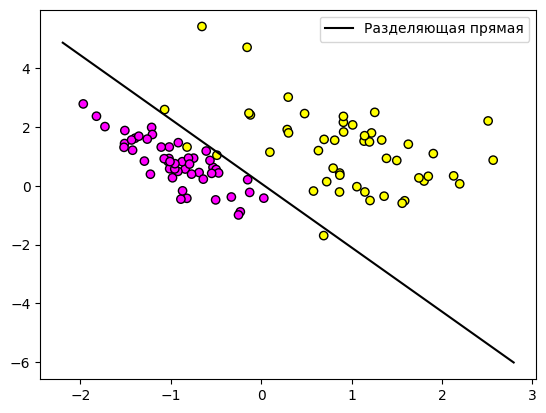

In [8]:
C = 1.0
alphas = solve_svm_qp(X, y, C)
w, b = get_weights_and_bias(X, y, alphas)

def plot_svm_qp(X, y, w, b):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='spring', edgecolors='k')
    xlim = plt.gca().get_xlim()
    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = (-w[0] * xx - b) / w[1]
    plt.plot(xx, yy, 'k-', label="Разделяющая прямая")
    plt.legend()
    plt.show()

# Отображаем результат
plot_svm_qp(X, y, w, b)

**2 пункт**

In [9]:
def plot_svm_decision_boundary(X, y, kernel, C, subplot_position, title):
    plt.subplot(1, 3, subplot_position)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    model = SVC(kernel=kernel, C=C)
    model.fit(X_scaled, y)
    
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=50, cmap='spring', edgecolors='k')
    
    #Отображение опорных векторов
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='black', label='Support Vectors')
    
    # Отображение разделяющей линии
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()
    
    #задаем сетку
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
    
    plt.title(title)
    plt.legend()



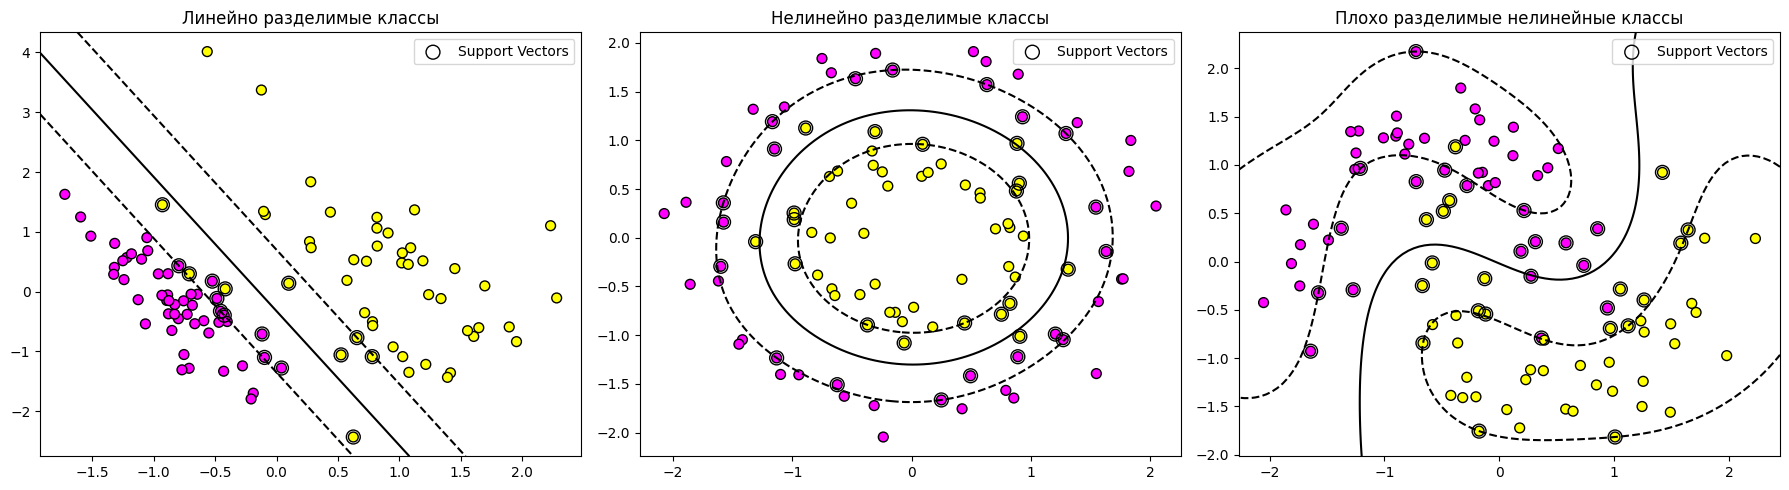

In [10]:
plt.figure(figsize=(18, 5))

# линейно разделимые классы
X1, y1 = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=2)
plot_svm_decision_boundary(X1, y1, kernel='linear', C=1.0, subplot_position=1, title="Линейно разделимые классы")

# Нелинейно разделимые классы (используем нелинейное ядро)
X2, y2 = make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)
plot_svm_decision_boundary(X2, y2, kernel='rbf', C=1.0, subplot_position=2, title="Нелинейно разделимые классы")

# Плохо разделимые нелинейные классы (используем make_moons)
X3, y3 = make_moons(n_samples=100, noise=0.2, random_state=42)
plot_svm_decision_boundary(X3, y3, kernel='rbf', C=1.0, subplot_position=3, title="Плохо разделимые нелинейные классы")

plt.tight_layout()
plt.show()

**3 пункт**

In [11]:
def plot_svm_decision_boundary(X, y, kernel, C, subplot_position, title):
    plt.subplot(1, len(C_values), subplot_position)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    model = SVC(kernel=kernel, C=C)
    model.fit(X_scaled, y)
    
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=50, cmap='spring', edgecolors='k', label='Data points')
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='black', label='Support Vectors')
    
    # Отображение разделяющей линии
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()
    
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500), np.linspace(ylim[0], ylim[1], 500))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
    
    plt.title(f'{title}\nC={C}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()


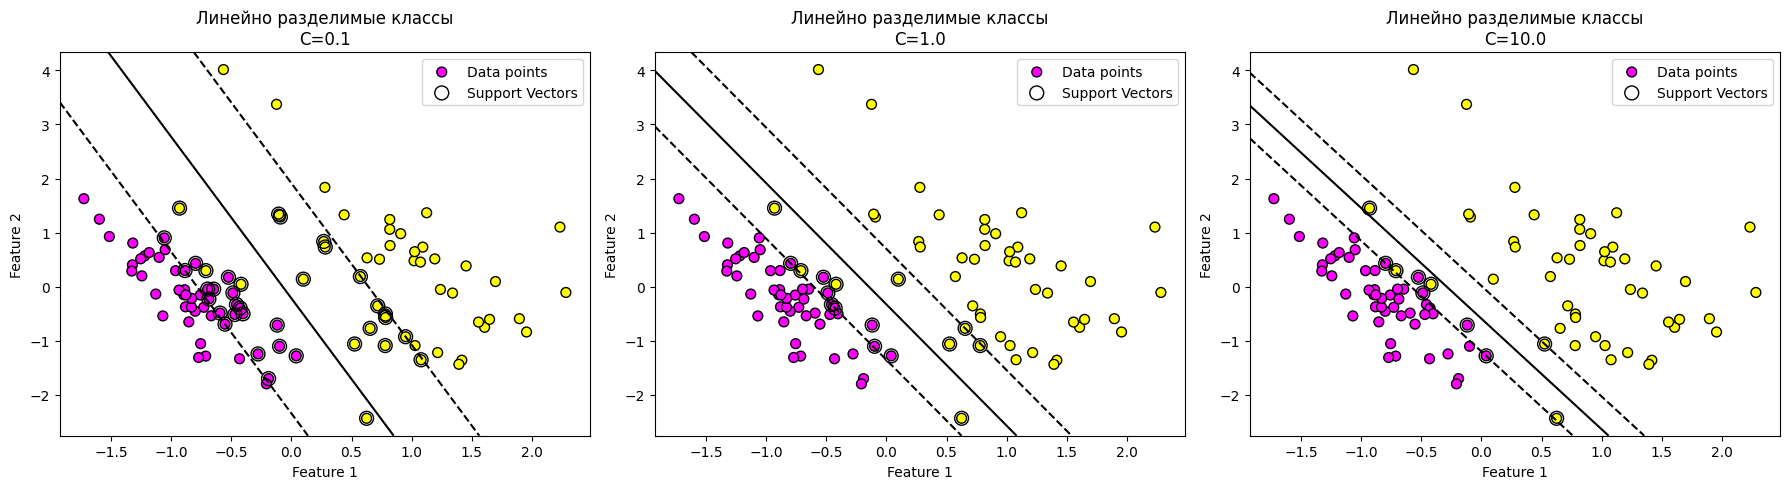

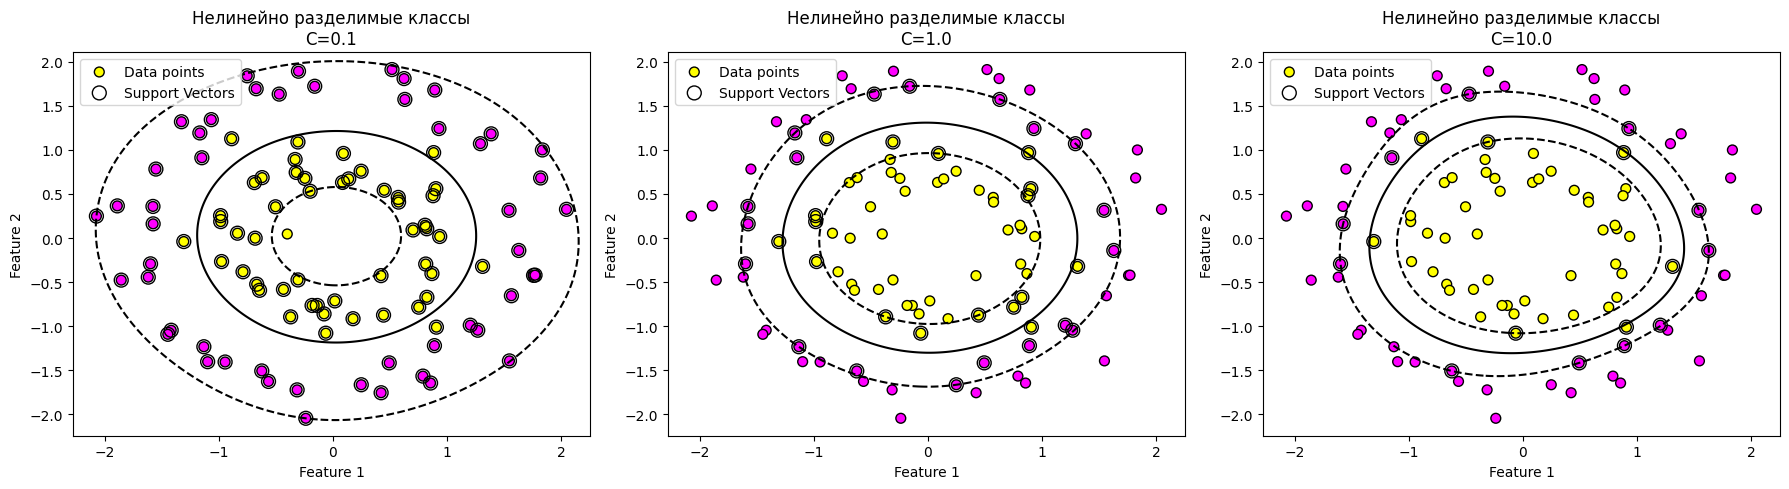

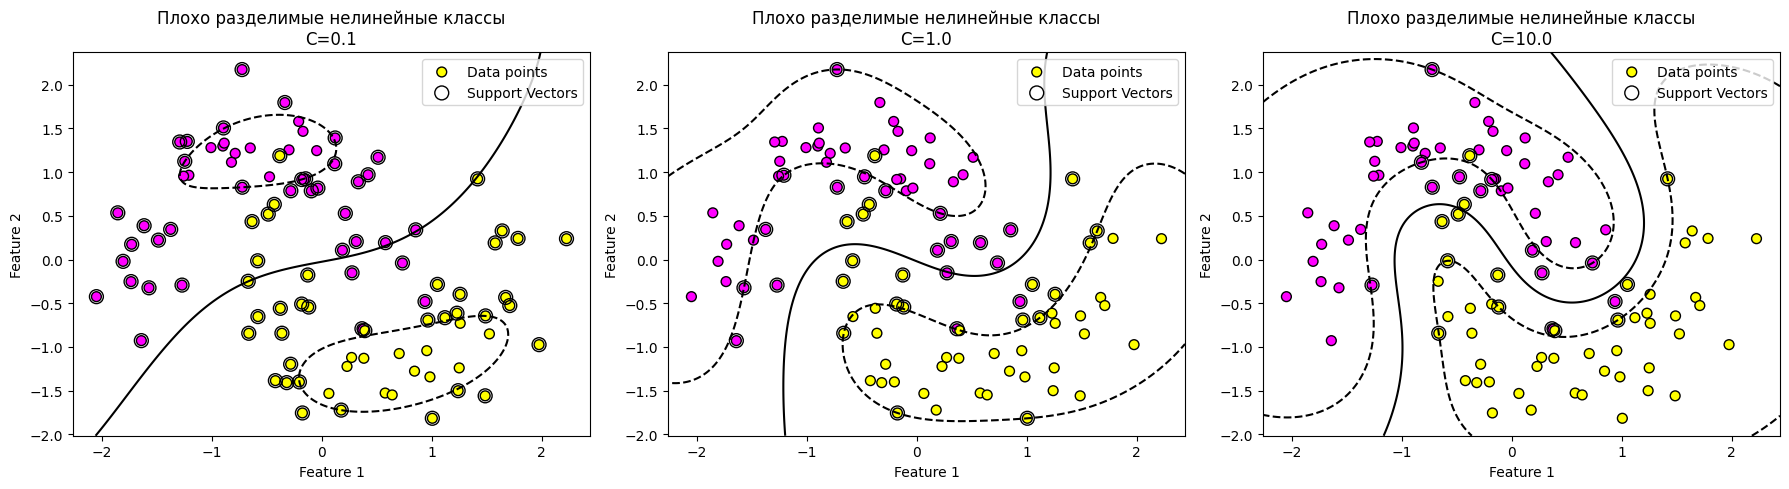

In [12]:
# Определение значений C
C_values = [0.1, 1.0, 10.0]

plt.figure(figsize=(18, 5))

#Линейно разделимые классы
X1, y1 = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=2)
for i, C in enumerate(C_values, 1):
    plot_svm_decision_boundary(X1, y1, kernel='linear', C=C, subplot_position=i, title="Линейно разделимые классы")

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 5))

#Нелинейно разделимые классы (используем нелинейное ядро)
X2, y2 = make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)
for i, C in enumerate(C_values, 1):
    plot_svm_decision_boundary(X2, y2, kernel='rbf', C=C, subplot_position=i, title="Нелинейно разделимые классы")

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 5))

#Плохо разделимые нелинейные классы (используем make_moons)
X3, y3 = make_moons(n_samples=100, noise=0.2, random_state=42)
for i, C in enumerate(C_values, 1):
    plot_svm_decision_boundary(X3, y3, kernel='rbf', C=C, subplot_position=i, title="Плохо разделимые нелинейные классы")

plt.tight_layout()
plt.show()


**4 пункт**

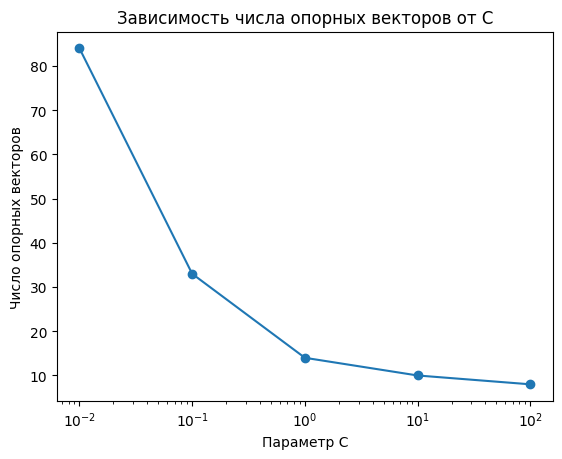

In [13]:
Cs = [0.01, 0.1, 1, 10, 100]
n_support_vectors = []

for C in Cs:
    clf = svm.SVC(C=C, kernel='linear')
    clf.fit(X1, y1)
    n_support_vectors.append(len(clf.support_vectors_))

plt.plot(Cs, n_support_vectors, marker='o')
plt.xscale('log')
plt.xlabel('Параметр C')
plt.ylabel('Число опорных векторов')
plt.title('Зависимость числа опорных векторов от C')
plt.show()


**5 пункт**

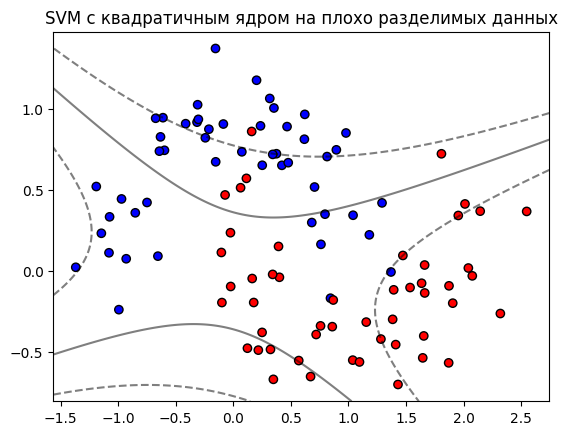

In [14]:
clf_poly = svm.SVC(C=1.0, kernel='poly', degree=2)
clf_poly.fit(X3, y3)

def plot_poly_svm(X, y, model, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                         np.linspace(ylim[0], ylim[1], 500))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.title(title)

plot_poly_svm(X3, y3, clf_poly, 'SVM с квадратичным ядром на плохо разделимых данных')
plt.show()


# 3. Двойственный переход и ядровой SVM